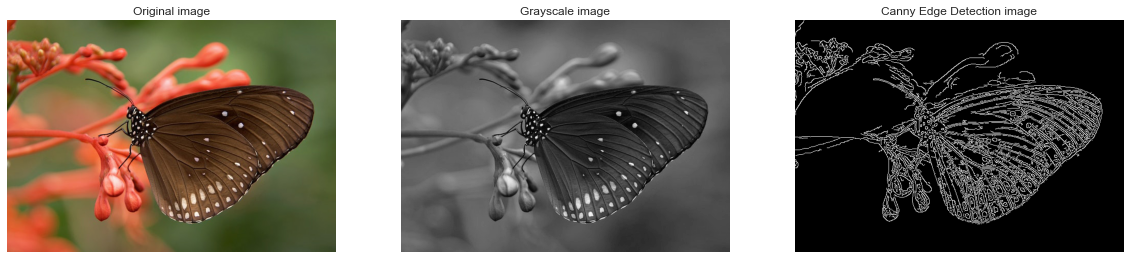

In [5]:
#Canny edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

loaded_image=cv2.imread("butterfly.jpg")
loaded_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)

gray_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)

edged_image=cv2.Canny(gray_image,threshold1=10,threshold2=100)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(loaded_image,cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("Grayscale image")
plt.subplot(1,3,3)
plt.imshow(edged_image,cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detection image")
plt.show()

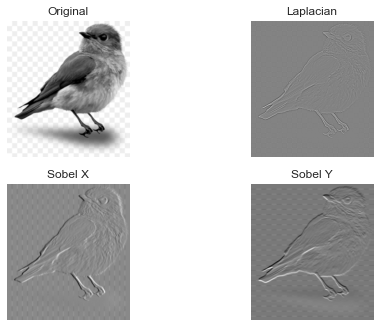

In [7]:
#Laplacian and sobel edge detecting methods

import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread("bird.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.GaussianBlur(gray,(3,3),0)

laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

plt.show()

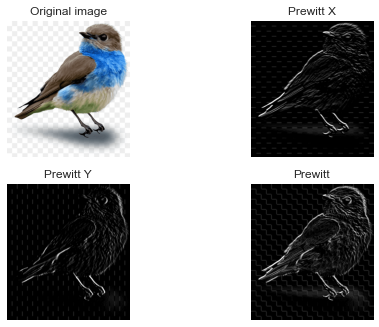

In [17]:
#Edge detection using prewitt operator

import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread("bird.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gaussian=cv2.GaussianBlur(gray,(3,3),0)

kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx=cv2.filter2D(img_gaussian,-1,kernelx)
img_prewitty=cv2.filter2D(img_gaussian,-1,kernely)

#cv2.imshow("Original Image",img)
#cv2.imshow("Prewitt X",img_prewittx)
#cv2.imshow("Prewitt Y",img_prewitty)
#cv2.imshow("Prewitt",img_prewittx+img_prewitty)

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title('Original image')

plt.subplot(2,2,2)
plt.imshow(img_prewittx,cmap='gray')
plt.axis("off")
plt.title('Prewitt X')

plt.subplot(2,2,3)
plt.imshow(img_prewitty,cmap='gray')
plt.axis("off")
plt.title('Prewitt Y')

plt.subplot(2,2,4)
plt.imshow(img_prewittx+img_prewitty,cmap='gray')
plt.axis("off")
plt.title('Prewitt')

cv2.waitKey(0)
cv2.destroyAllWindows()

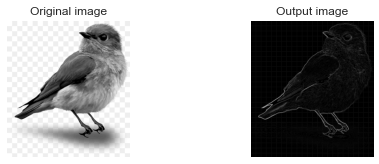

In [19]:
#Roberts edge detection-Roberts cross operator

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

roberts_cross_v=np.array([[1,0],
                       [0,-1]])
roberts_cross_h=np.array([[0,1],
                       [-1,0]])

img=cv2.imread('bird.png',0).astype('float64')
img/=255.0
vertical=ndimage.convolve(img,roberts_cross_v)
horizontal=ndimage.convolve(img,roberts_cross_h)

edged_img=np.sqrt(np.square(horizontal)+np.square(vertical))
edged_img*=255
cv2.imwrite('output.jpg',edged_img)

#cv2.imshow("OutputImage",edged_img)

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title('Original image')

plt.subplot(2,2,2)
plt.imshow(edged_img,cmap='gray')
plt.axis("off")
plt.title('Output image')

cv2.waitKey(0)
cv2.destroyAllWindows()